<a href="https://colab.research.google.com/github/Sandipan0303/Unsupervised-online-retail-customer-segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project_by_Sandipan_Das.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_excel('/content/drive/MyDrive/Copy of Online Retail.xlsx')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df.shape

(541909, 8)

We can see that our dataset consists of 541909 rows and 8 columns


In [9]:
#checking duplicate values in our dataset
df.duplicated().sum()

5268

There are 5268 duplicate values in our dataset

In [10]:
# Dropping the duplicate rows of the dataset
df.drop_duplicates(inplace = True)


In [11]:
# Checking for any Null values

df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

We can see that description and customer id columns have huge number of null values and therrfore some treatment is required.

In [12]:
# Dropping Null values present in the dataset
df.dropna(inplace = True)


In [13]:
#checking shape of or dataset after removing null values
df.shape

(401604, 8)

In [14]:
#we have to drop some InvoiceNo which are starts with 'c' because 'c', it indicates a cancellation
df['InvoiceNo'] = df['InvoiceNo'].astype('str')


In [15]:
df=df[~df['InvoiceNo'].str.contains('C')]


In [16]:
df.shape

(392732, 8)

After removing cancelled invoice numbers the shape of our dataset reduced to 392732 rows and 8 columns

In [17]:
#lets have a look at the columns of our dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [18]:
# Extracting new features from InvoiceDate column

df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month_name()
df["Weekday"] = df["InvoiceDate"].dt.day_name()
df["Hour"] = df["InvoiceDate"].dt.hour


In [19]:
# create TotalAmount from Quantity and UnitPrice
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Weekday,Hour,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34


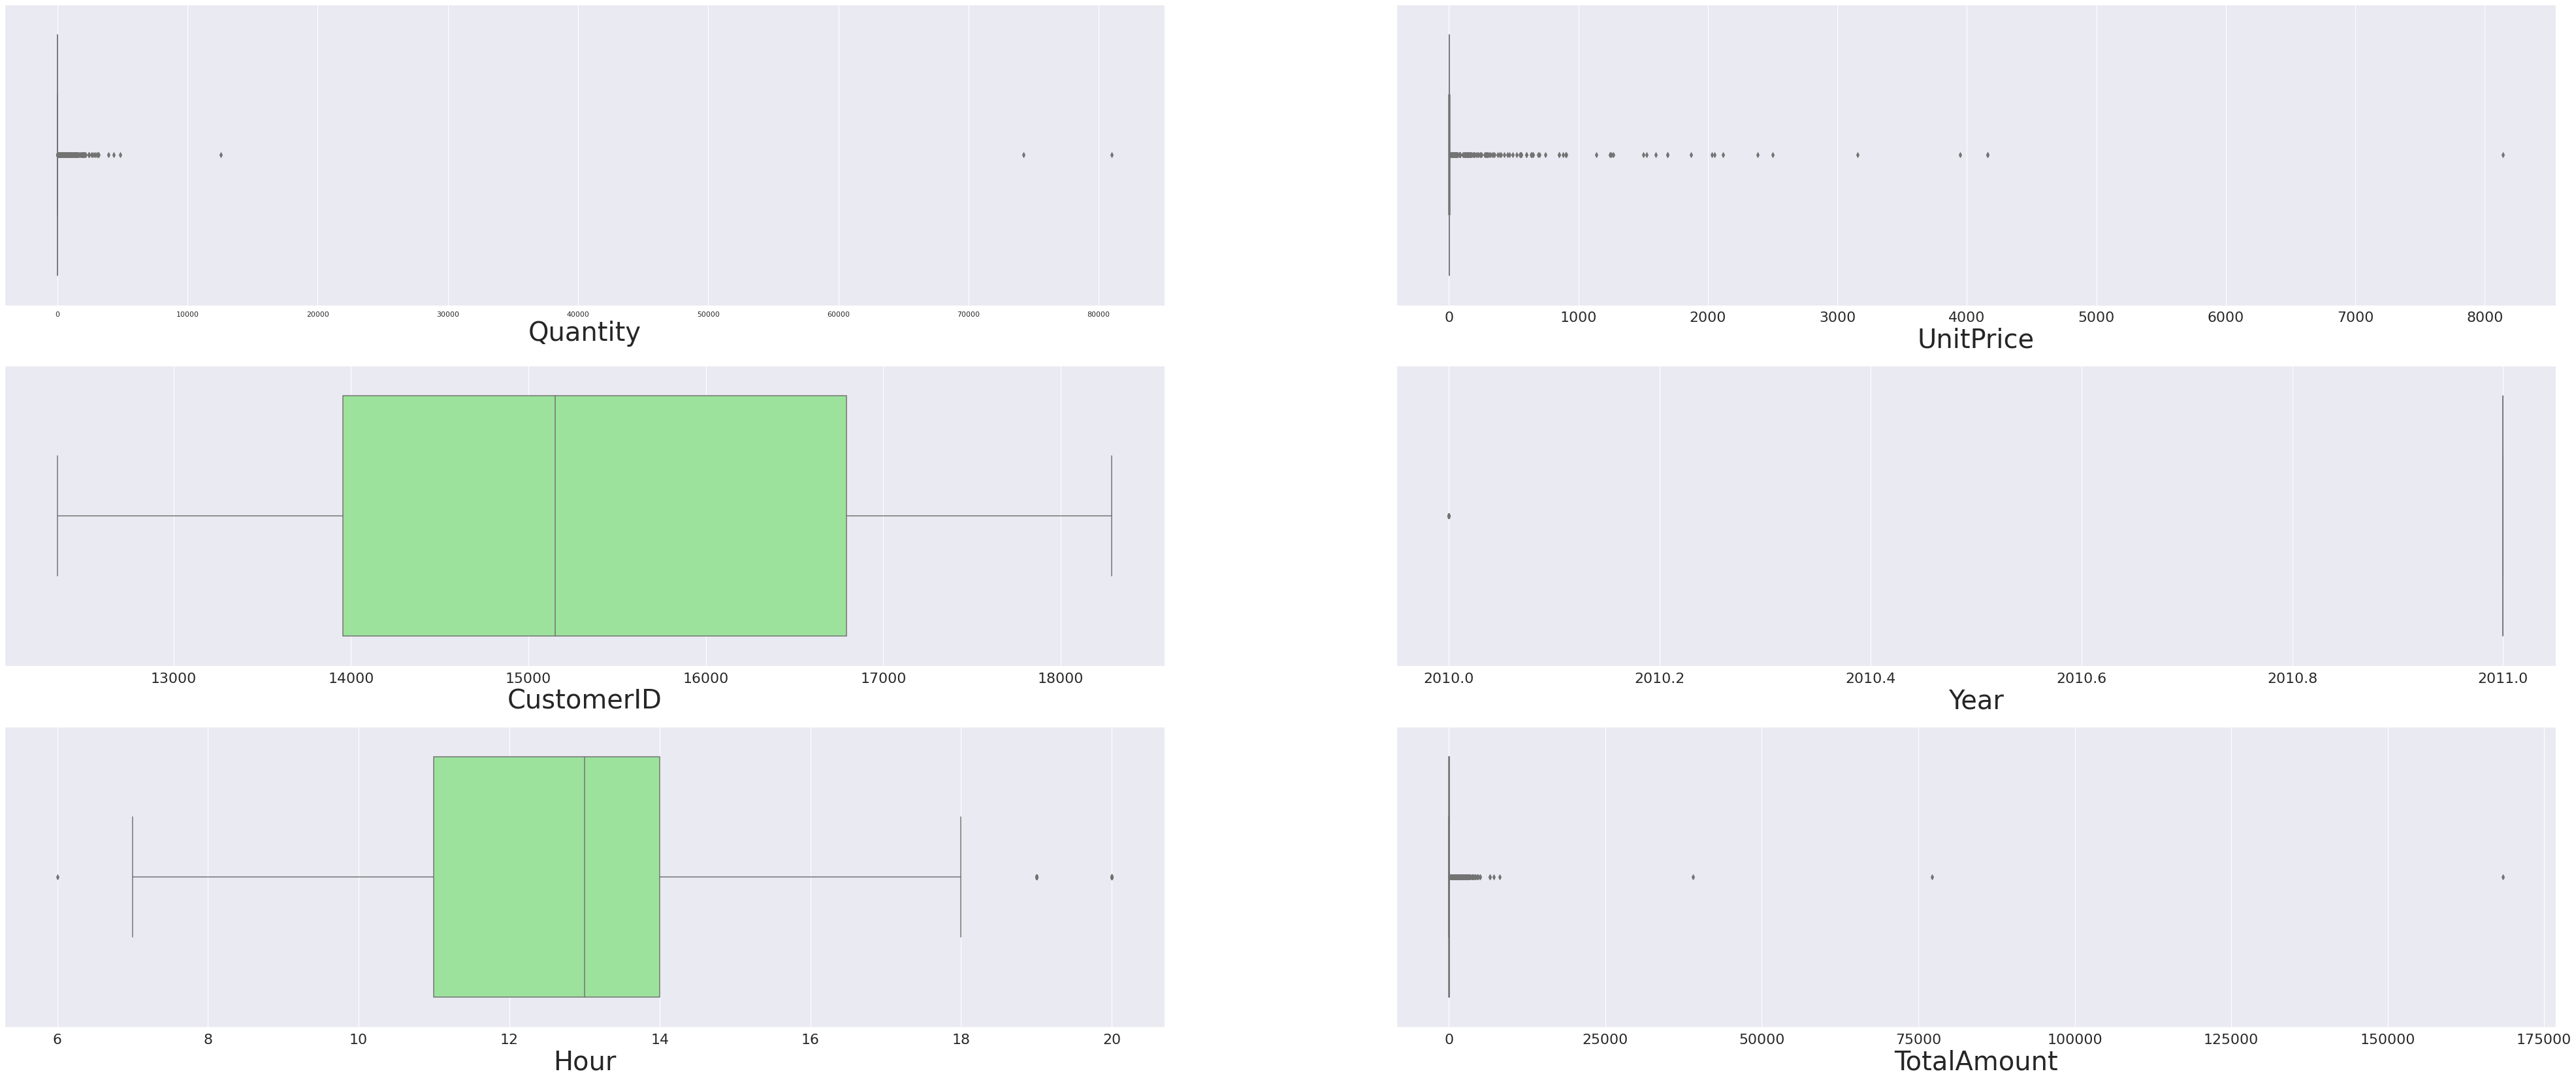

In [21]:
#Lets check for outliers in our datasets
# Box plot to detect outliers

lst_box = df.describe().columns
plt.figure(figsize = (70,100))
sns.set_theme()
for i in enumerate(lst_box):
  plt.subplot(10, 2, i[0]+1)
  sns.set(font_scale = 2)
  sns.boxplot(df[i[1]], color= 'lightgreen')
  plt.xlabel(i[1], fontsize=40)


We can clearly see that quantity and unit price has some outliers so some treatment is required. We will use zscore method to handle our outliers .In this method we will use two more columns for zscore 'z_quantity, z_unitPrice'. Then we will filter our data by putting conditions that bonly entries having z_score less than 3 will be considered.

In [22]:
from scipy import stats

In [23]:
df['z_Quantity']=np.abs(stats.zscore(df['Quantity']))
df['z_UnitPrice']=np.abs(stats.zscore(df['UnitPrice']))

In [24]:
#remove zscore that are greater than 3
df=df[(df['z_Quantity']<3)]
df=df[(df['z_UnitPrice']<3)]


In [25]:
#dropping z_Quantity and z_UNitPrice
df.drop(['z_Quantity','z_UnitPrice'], axis =1, inplace =True)

In [26]:
df.shape

(392124, 13)

#Exploratory Data Analysis

##Number of Unique Customers

In [27]:
print(f"Number of unique customers: {df.CustomerID.nunique()}")


Number of unique customers: 4319


There are total 4319 different customers in our dataset

## Number of Unique Countries

In [28]:
print(f"Number of unique countries: {df.Country.nunique()}")

Number of unique countries: 37


There are total 37 different countries in our dataset

# Top 10 countries with most number of orders

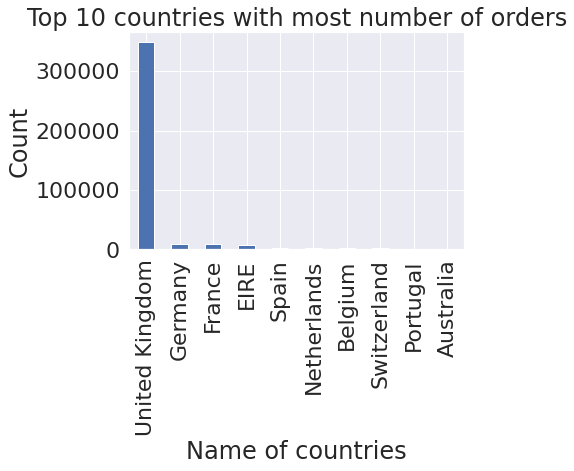

In [29]:
df["Country"].value_counts().head(10).plot(kind = "bar")
plt.title("Top 10 countries with most number of orders")
plt.xlabel("Name of countries")
plt.ylabel("Count")


plt.show()


The above visualisation shows that the majority of orders come from the United Kingdom, followed by Germany and France, indicating that online retail store is very common in Europe.

## Top 10 countries with least number of orders

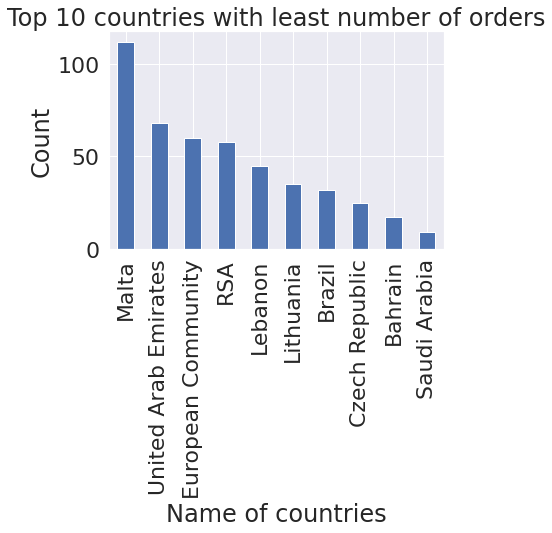

In [30]:
df["Country"].value_counts().tail(10).plot(kind = "bar")
plt.title("Top 10 countries with least number of orders")
plt.xlabel("Name of countries")
plt.ylabel("Count")


plt.show()

According to the above visualisation, the least number of orders come from the Saudi Arabia, followed by Bahrain, indicating that online retail store has very few customers from the Middle East.

## Looking at number of Customers from different countries

In [31]:

country_cust = df.groupby('Country')['CustomerID'].nunique().reset_index().sort_values('CustomerID', ascending=False)
country_cust.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
country_cust.head()



,Country,Customer_Count
35,United Kingdom,3901
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25


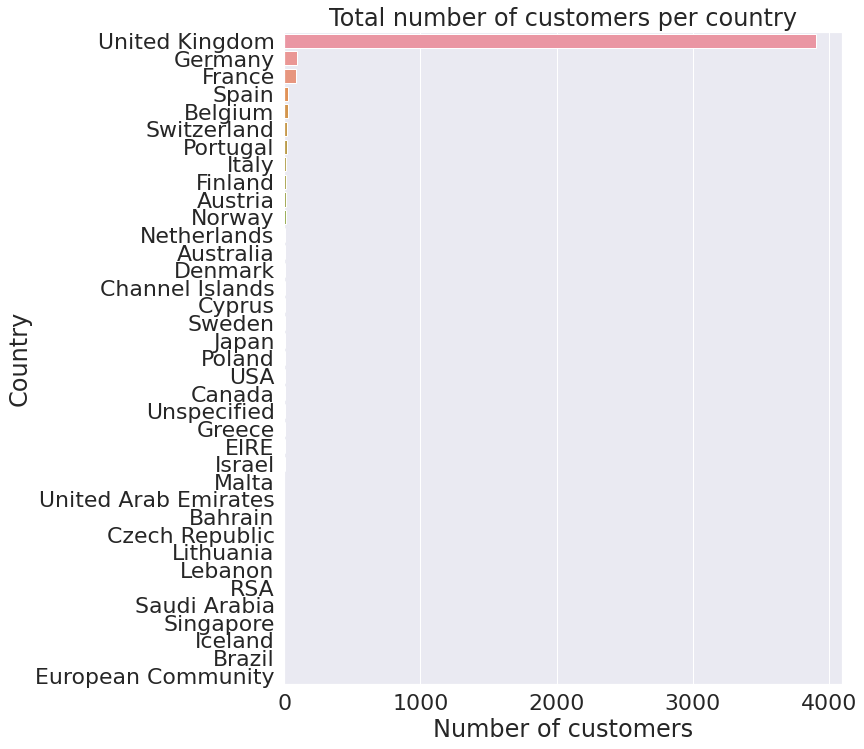

In [32]:
plt.figure(figsize = (10, 12))
customer_per_country = df.groupby("Country")["CustomerID"].nunique().sort_values(axis = 0, ascending = False)
sns.barplot(x = customer_per_country.values, y = customer_per_country.index)
plt.title("Total number of customers per country")
plt.xlabel("Number of customers")

plt.show()

It is clearly visible from the data and the graph that UK has the most number of customers followed by Germany and France . It cna be assumed that Europe is the most dominated area.

## Which products are the most sold ones?

In [33]:
# count of each product description
desc_df = df['Description'].value_counts().reset_index()
desc_df.rename(columns={'index': 'Description Name'}, inplace=True)
desc_df.rename(columns={'Description': 'Count'}, inplace=True)
desc_df.head()


,Description Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2011
1,REGENCY CAKESTAND 3 TIER,1714
2,JUMBO BAG RED RETROSPOT,1612
3,ASSORTED COLOUR BIRD ORNAMENT,1392
4,PARTY BUNTING,1390


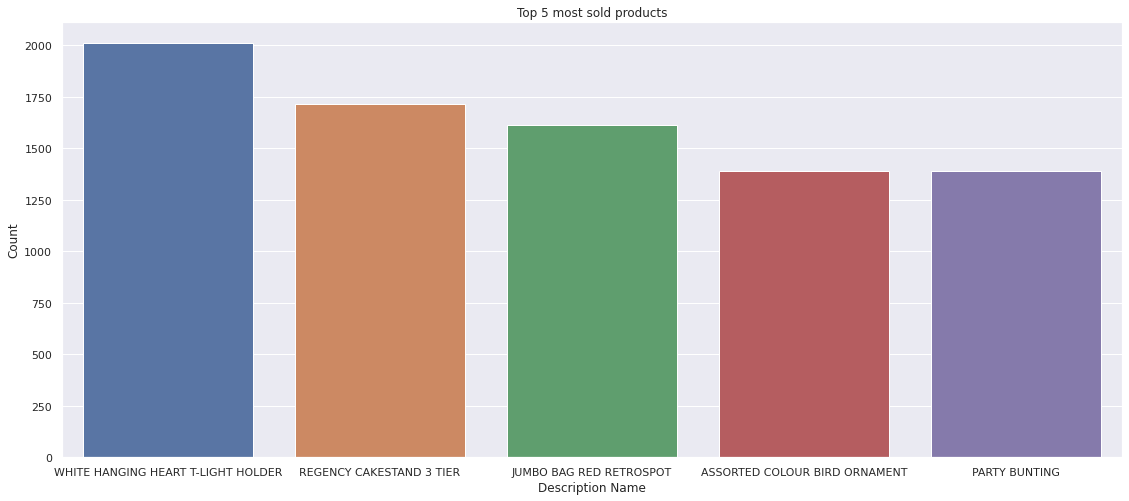

In [34]:
# plot the top 5 most sold products
sns.set(rc = {'figure.figsize' :(19,8)})
p=sns.barplot(x='Description Name', y='Count', data=desc_df[:5])
plt.title('Top 5 most sold products')
plt.show()

The top 5 most sold products are:

White Hanging Heart T-Light Holder

Regency Cakestand 3 Tier

Jumbo Bag Red Retrospot

Assorted Colour Bird Ornament

Party Bunting

## Which products are the least sold ones?

In [35]:
desc_df.tail()

,Description Name,Count
3865,ORANGE FELT VASE + FLOWERS,1
3866,ROBIN CHRISTMAS CARD,1
3867,TEA TIME BREAKFAST BASKET,1
3868,PINK DAISY BAG CHARM,1
3869,NEW BAROQUE B'FLY NECKLACE CRYSTAL,1


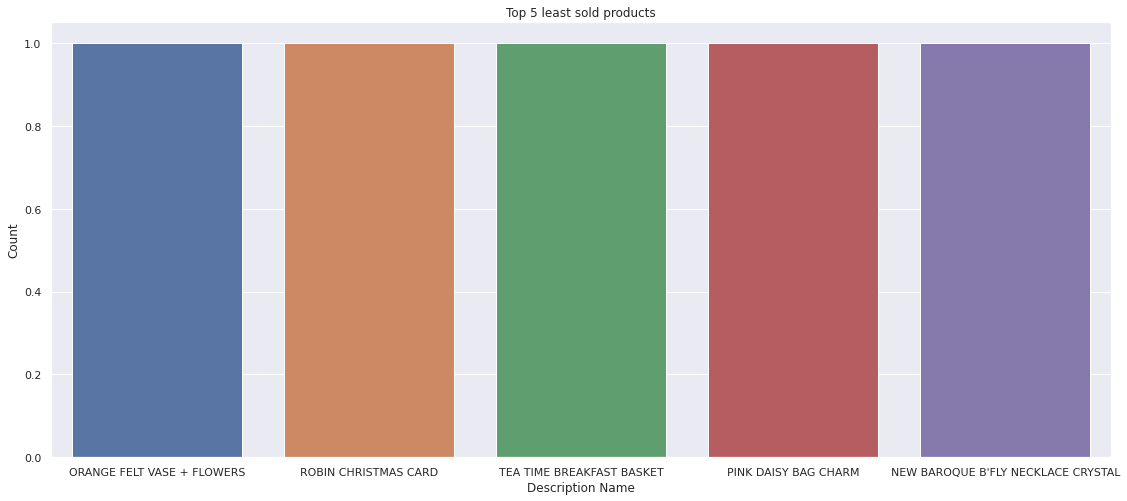

In [36]:
# plot the top 5 least sold products
sns.barplot(x='Description Name', y='Count', data=desc_df[-5:])
plt.title('Top 5 least sold products')
plt.show()


The top 5 least sold products are:

Green with Metal Bag Charm

White with Metal Bag Charm

Blue/Nat Shell Necklace W Pendant

Pink Easter Hens + Flower

Paper Craft, Little Birdie

(each of 1 unit)

## Amount of sales in days of week

In [37]:

weekday_df=df['Weekday'].value_counts()
weekday_df.rename({'index': 'Weekday'}, inplace=True)
weekday_df.rename({'Description': 'Sales'}, inplace=True)
weekday_df


Thursday     79107
Wednesday    67920
Tuesday      65616
Monday       64136
Sunday       61187
Friday       54158
Name: Weekday, dtype: int64

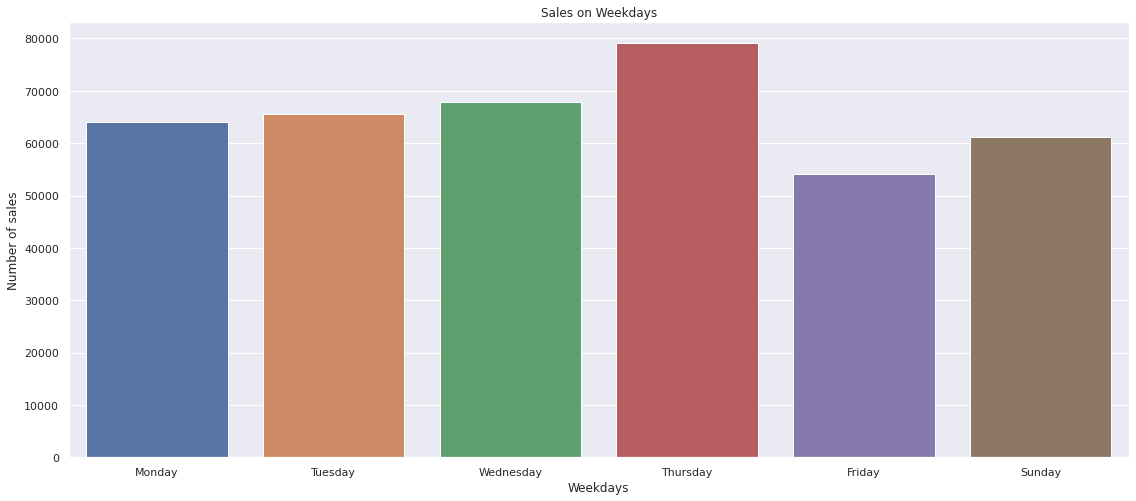

In [38]:
# Visualisation of total number of sales on weekdays 

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Sunday"]

weekdays_sale = df["Weekday"].value_counts()
sns.barplot(x = weekdays_sale.index, y = weekdays_sale.values, order = days_order)
plt.title("Sales on Weekdays")
plt.xlabel("Weekdays")
plt.ylabel("Number of sales")

plt.show()

We can see that sales is highest at Thursday and lowest in Friday.

## Looking at sales at specific hour of the day

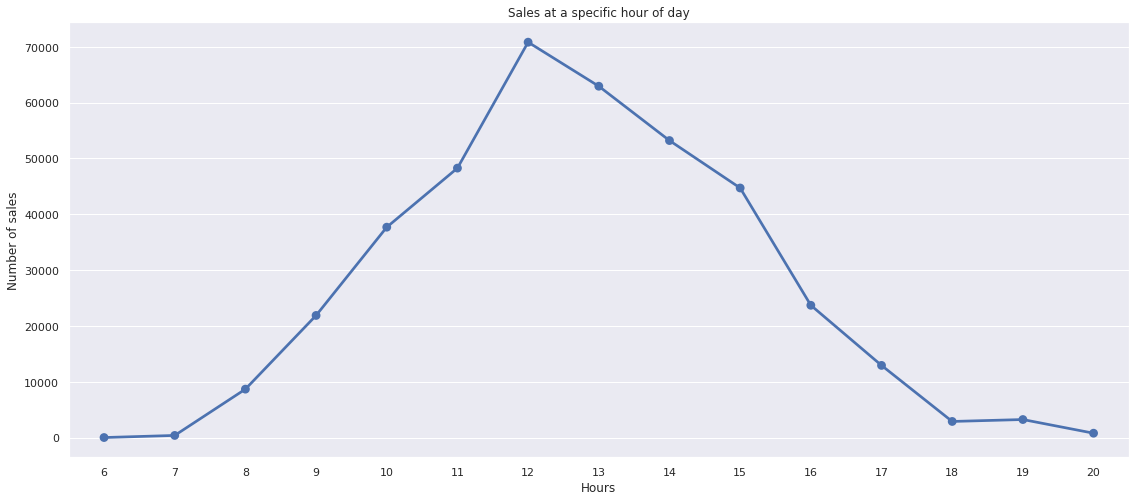

In [39]:
# Representation of total number of sales at specific hour of day

hours_sale = df["Hour"].value_counts()
sns.pointplot(x = hours_sale.index, y = hours_sale.values)
plt.title("Sales at a specific hour of day")
plt.xlabel("Hours")
plt.ylabel("Number of sales")

plt.show()

In [40]:
# group the time into 3 buckets
def time_day(time):
  if (time >= 6 and time <= 11):
    return 'Morning'
  elif (time >= 12 and time <= 17):
    return 'Afternoon'
  else:
    return 'Evening'

# apply the function into the column
df['time_day'] = df['Hour'].apply(time_day)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Weekday,Hour,TotalAmount,time_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34,Morning


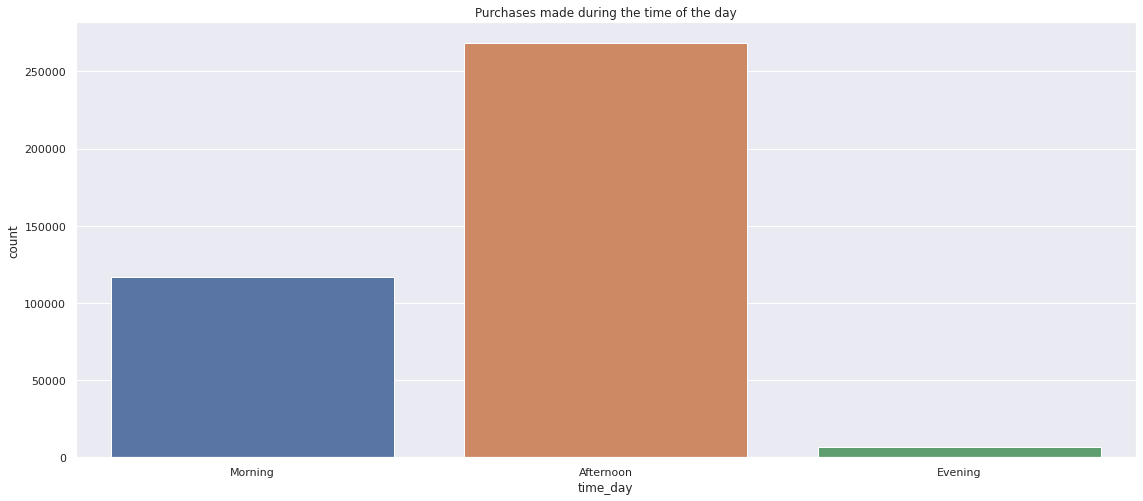

In [41]:
# plot the number of purchases w.r.t hour again
sns.countplot(x='time_day', data=df)
plt.title('Purchases made during the time of the day')
plt.show()

We can see that Sales is highest during the afternoon period (between 11:00 AM and 3:00 PM)

## Visualizing the Monthly Sales Trend

In [42]:
# number of purchases w.r.t month
month_df = df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
month_df


,Month Name,Month
0,November,63132
1,October,48725
2,December,42632
3,September,39606
4,May,28026
5,June,26881
6,March,26810
7,August,26754
8,July,26550
9,April,22379


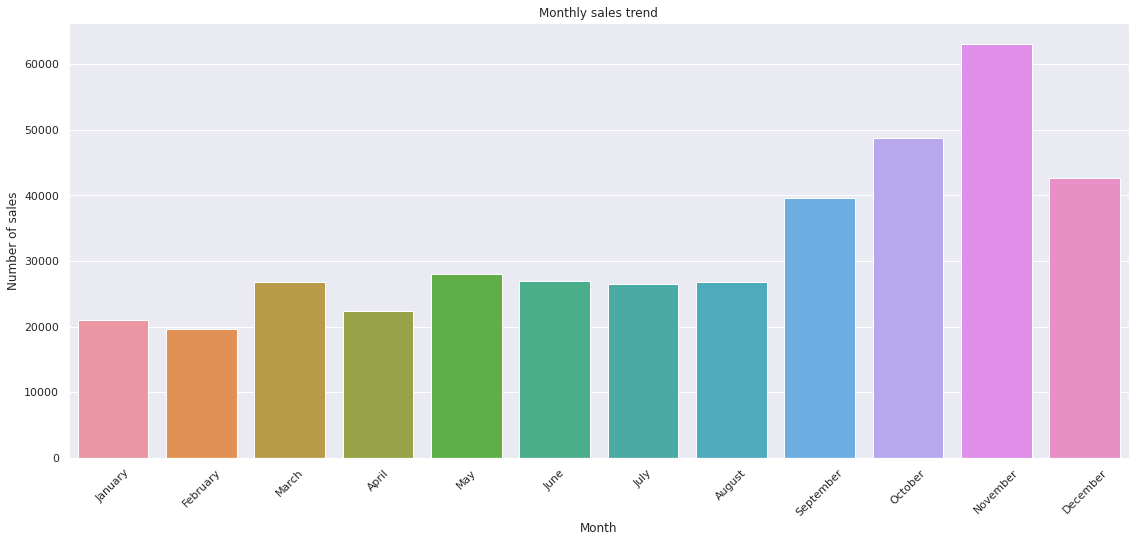

In [43]:
# Visualisation of monthly sales trend

months_order = ["January", "February", "March", "April", "May", "June", "July", 
                "August", "September", "October", "November", "December"]

monthly_sale = df["Month"].value_counts()
sns.barplot(x = monthly_sale.index, y = monthly_sale.values, order = months_order)
plt.title("Monthly sales trend")
plt.xlabel("Month")
plt.ylabel("Number of sales")
plt.xticks(rotation = 45)

plt.show()

From the above Barplot we can clearly see that Sales is highest during the November month followed by October.

#CONCLUSIONS FROM EDA

#### 1. There are 37 different countries present in our dataset with United Kingdom holding the most number of orders followed by followed by Germany and the least number of orders are placed from countries like Saudi Arabia, Bahrain.It can be assumed that European sector is doing well from the beginning and companies should make strategies to make sales more in Middle East Countries.
####2. As the number of orders are more from United Kingdom , the number of customers are also more as well from here only.
####3.The demand of WHITE HANGING HEART T-LIGHT HOLDER	is more as comapred to the other products. It can be well assumed that the quality of this product might be good along with its requirement in the European sector as most of the sales are generated from there only. It can be a type of a warm cloth as weather in Europe is comparatively cooler the other parts.
####4. The demand of NEW BAROQUE B'FLY NECKLACE CRYSTAL	is the lowest followed by PINK DAISY BAG CHARM . It is clearly visible that Women's usable products demands are very less. It might be Women might not be very much comfortable with online shopping. 
####5. From the weekly daily sales we can see that sales are more in weekdays and along with that the timing of the sales is more during the afternoon time. It can be well assumed that during workingdays when people get break for lunch during afternoon at that time they place thier orders.
####6. Sales are more during the month of november might be due to Christmas as Christmas shopping takes place even in places like Germany Tollwood winter festival takes place.

#DATA PREPARATION FOR RFM SEGMENTATION

RFM segmentation (Recency, Frequency, Monetary) is a tried-and-true marketing model for behavior-based customer segmentation. It categorises customers based on their purchase history - how recently, how frequently, and how much they purchased. Therefore in this project, I will be performing RFM segmentation using unsupervised machine learning.

RFM segmentation helps in categorising customers and identifying customers who are more likely to respond to promotions as well as future personalisation services.

RFM modelling requires the following features:

Customer ID / Email / Name, and so on: To identify the customer.
Recency(R): The number of days since the last purchase. How recently did the customer make a purchase?
Frequency(F): The total number of times a transaction is performed. How many times has the customer bought something from the store?
Monetary(M): The total amount of money spent on purchases. How much money did the customer spend?
      Recency = Latest Date - Last Invoice Data
      Frequency = Number of Invoices per transaction(s)
      Monetary = Total Amount for each customer
So, in order to perform RFM segmentation, I will have to create all of the above mentioned features.

## CALCULATING RFM SCORES

In [44]:
# filter UK data only
df = df[df['Country'] == 'United Kingdom']

# print the shape of the data
df.shape

(348723, 14)

In [45]:
import datetime as dt

In [46]:
# calculating RFM scores
# set latest date to '2011-12-10' as the last invoice date was '2011-12-09'
latest_date = dt.datetime(2011,12,10)

# create rfm modeling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x),
                                            'TotalAmount': lambda x: x.sum()})

# convert invoice date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# rename columns to frequency, recency, monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12747.0,2,103,4196.01
1,12748.0,0,4410,31687.49
2,12749.0,3,199,4090.88
3,12820.0,3,59,942.34
4,12821.0,214,6,92.72


In [47]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,3901.000000,3901.000000,3901.000000
mean,91.635478,89.393233,1693.955043
std,99.473614,214.347024,5913.873062
min,0.000000,1.000000,2.900000
25%,17.000000,17.000000,290.400000
50%,50.000000,41.000000,638.050000
75%,142.000000,98.000000,1547.360000
max,373.000000,7676.000000,238169.000000


## Let us plot the distribution of Recency, Frequency and Monetary Value

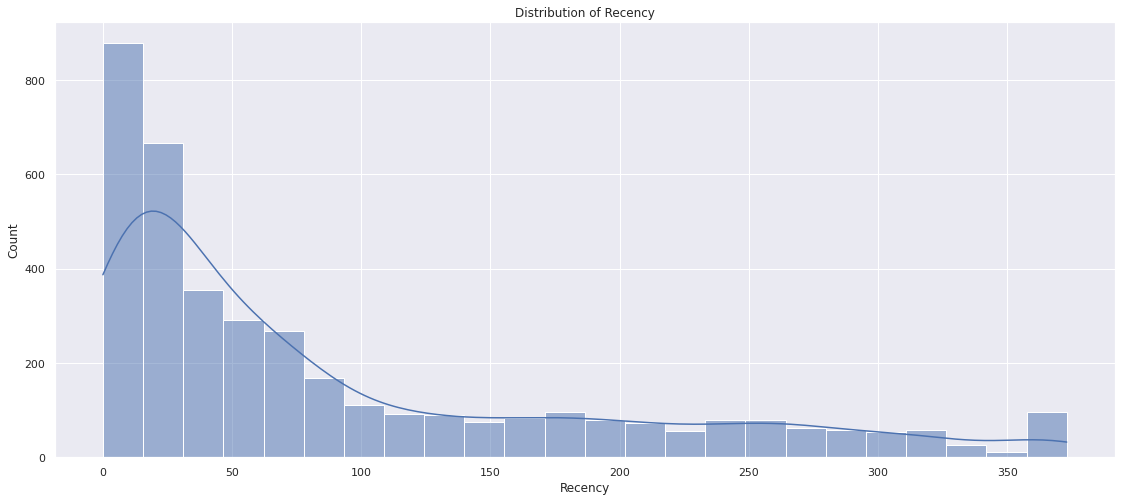

In [48]:
# Visualising the distribution of Recency

sns.histplot(x = "Recency", kde = True, data = rfm_df)
plt.title("Distribution of Recency")
plt.show()

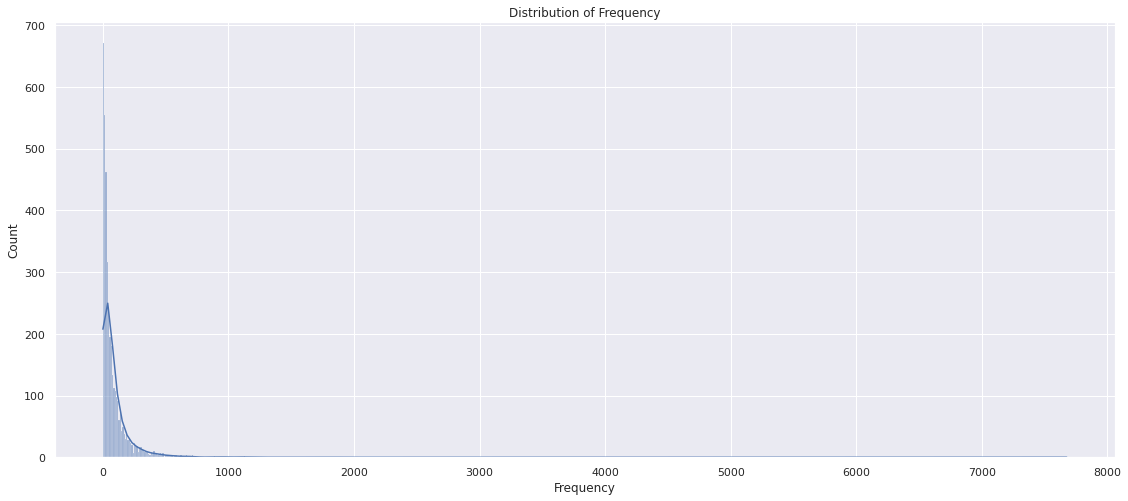

In [49]:
# Visualising the distribution of Frequency

sns.histplot(x = "Frequency", kde = True, data = rfm_df)
plt.title("Distribution of Frequency")
plt.show()

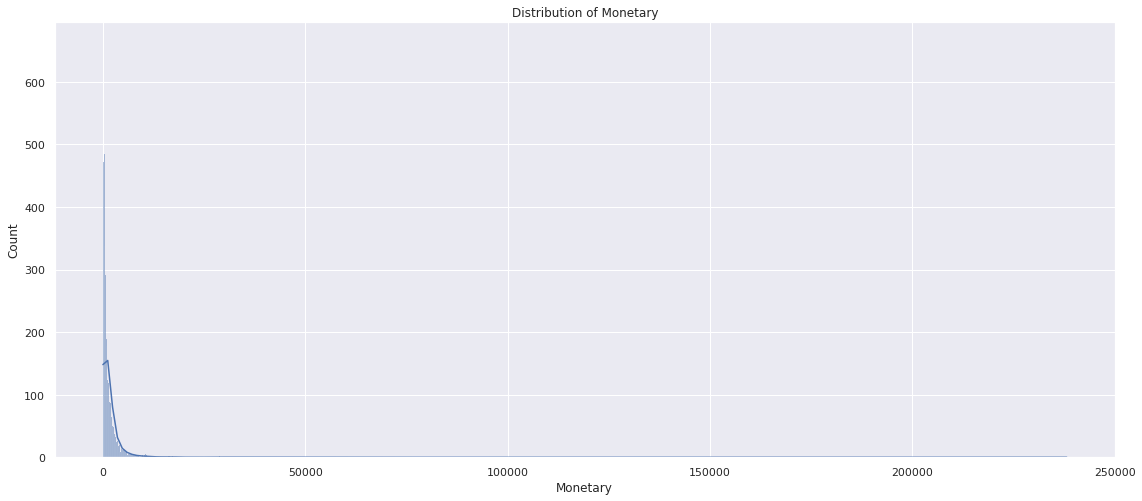

In [50]:
# Visualising the distribution of Monetary

sns.histplot(x = "Monetary", kde = True, data = rfm_df)
plt.title("Distribution of Monetary")
plt.show()

All the three values are appearing to be rightly skewed.

To deal with these skewed features, I'll use cube root and log transformation to create new transformed features for RFM. It will bring the data closer to normal distribution. But first, look how RFM features will appear following transformation

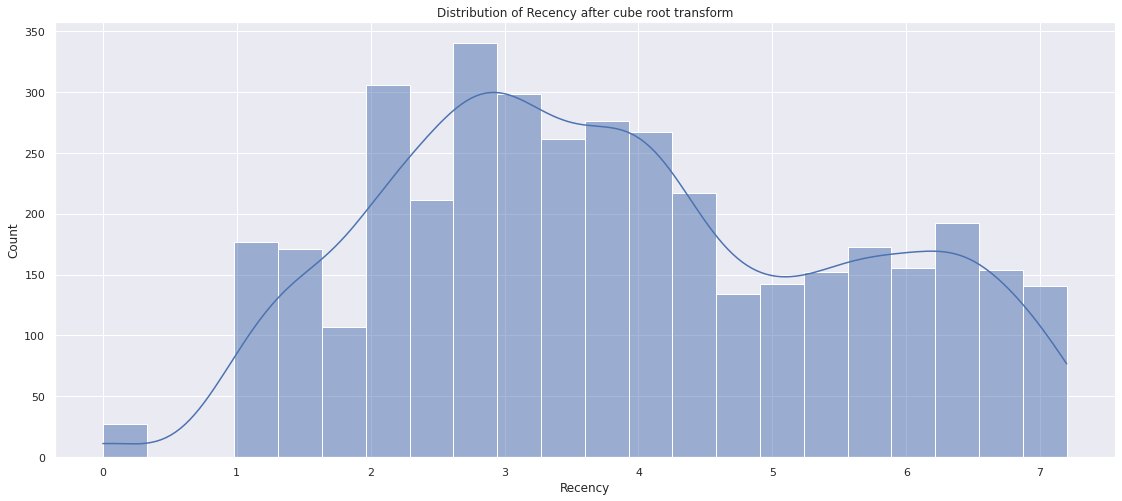

In [51]:
# Visualising the distribution of Recency after cube root transformation

sns.histplot(data = np.cbrt(rfm_df["Recency"]), kde = True)
plt.title("Distribution of Recency after cube root transform")
plt.show()


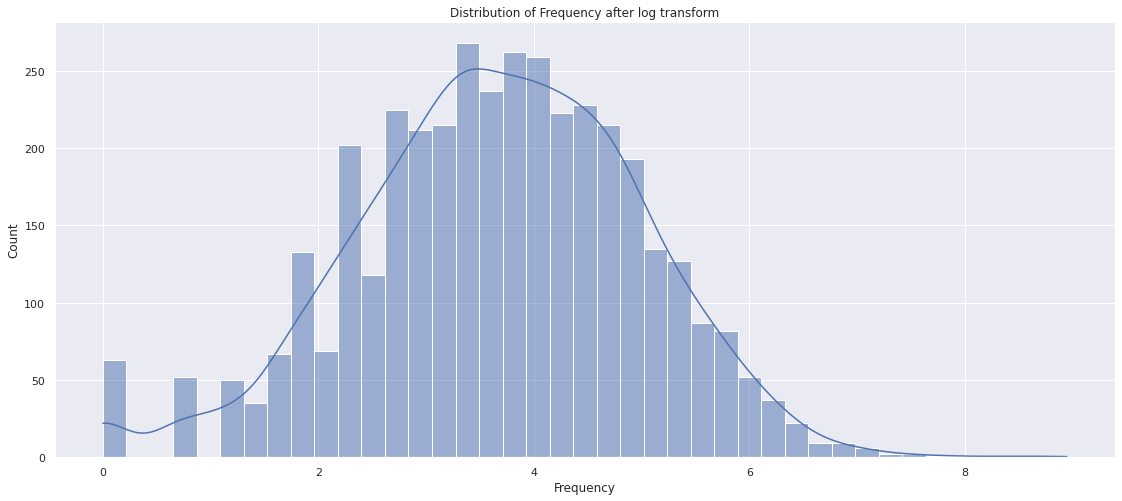

In [52]:
# Visualising the distribution of Frequency after log transformation

sns.histplot(data = np.log(rfm_df["Frequency"]), kde = True)
plt.title("Distribution of Frequency after log transform")
plt.show()


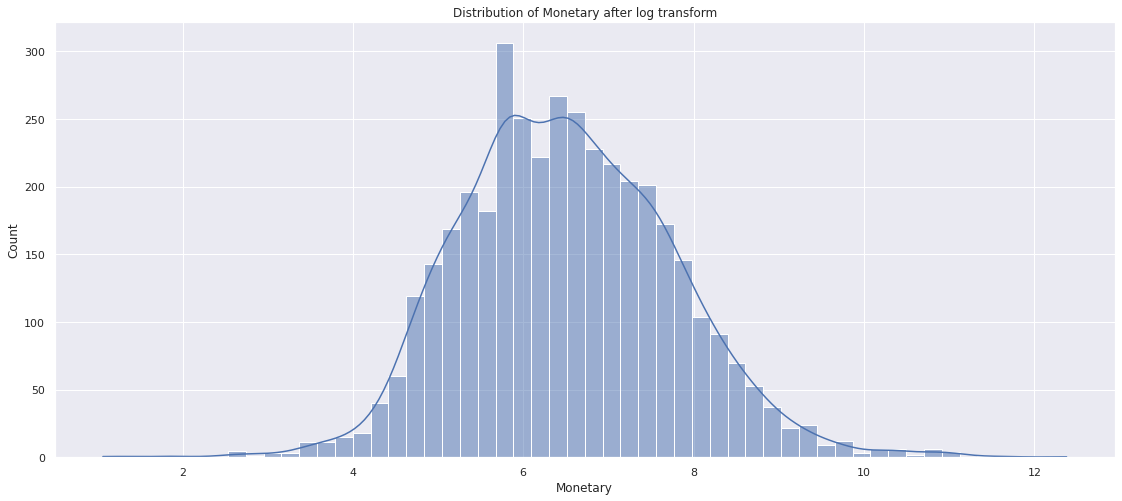

In [53]:
# Visualising the distribution of Monetary after log transformation

sns.histplot(data = np.log(rfm_df["Monetary"]), kde = True)
plt.title("Distribution of Monetary after log transform")
plt.show()

In [54]:
# Creating new transformed RFM features

rfm_df['transformed_Recency'] = np.cbrt(rfm_df['Recency'])
rfm_df['transformed_Frequency'] = np.log(rfm_df['Frequency'])
rfm_df['transformed_Monetary'] = np.log(rfm_df['Monetary'])


In [55]:
# Checking observations from the updated dataset

rfm_df.head()

,Recency,Frequency,Monetary,transformed_Recency,transformed_Frequency,transformed_Monetary
CustomerID,,,,,,
12747.0,2,103,4196.01,1.259921,4.634729,8.341889
12748.0,0,4410,31687.49,0.000000,8.391630,10.363677
12749.0,3,199,4090.88,1.442250,5.293305,8.316515
12820.0,3,59,942.34,1.442250,4.077537,6.848366
12821.0,214,6,92.72,5.981424,1.791759,4.529584


In [56]:
# Selecting features for RFM segmentation

data = rfm_df[["transformed_Recency", "transformed_Frequency", "transformed_Monetary"]].values.copy()


In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_prepared = scaler.fit_transform(data)


# Implementing K-Means Clustering:

The K-means clustering algorithm computes centroids and repeats until the optimal centroid is found. It is presumptively known how many clusters there are. It is also known as the flat clustering algorithm. The number of clusters found from data by the method is denoted by the letter ‘K’ in K-means.

Calculation of Silhouette Score:
Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

## Application of Silhoutte score

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [59]:
# kmeans with silhouette score method
from yellowbrick.cluster import SilhouetteVisualizer
features = ['transformed_Recency', 'transformed_Monetary']

# scaling our data
X_features = rfm_df[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)

# function to implement kmeans clustering with silhouette analysis
def silhouette_analysis(n):
  for n_clusters in range(2,n):
    km = KMeans(n_clusters = n_clusters)
    preds = km.fit_predict(X)
    centers = km.cluster_centers_

    score = silhouette_score(X, preds)
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(X)
    visualizer.poof()


For n_clusters = 2, silhouette score is 0.4184352198931567


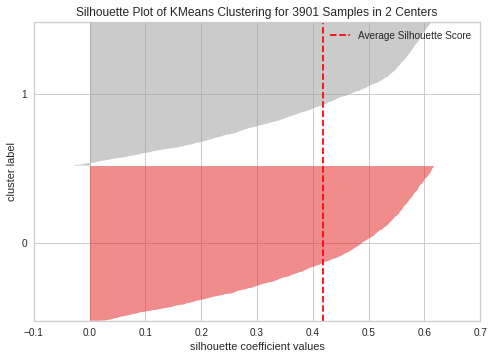

For n_clusters = 3, silhouette score is 0.3797738004334796


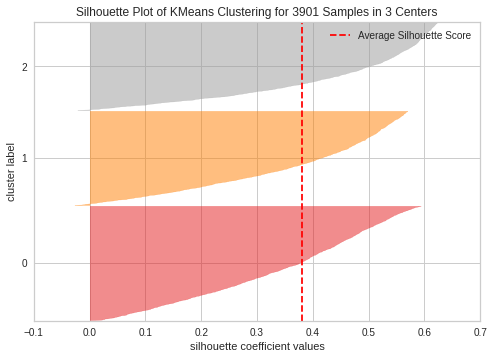

For n_clusters = 4, silhouette score is 0.37492710903008686


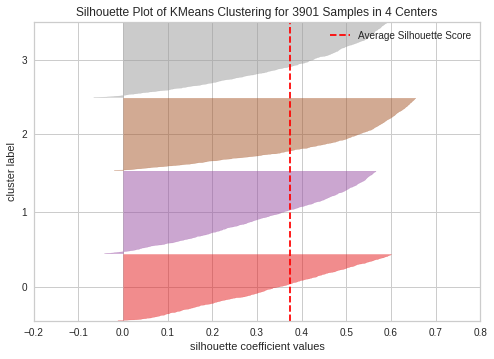

For n_clusters = 5, silhouette score is 0.36338761226376115


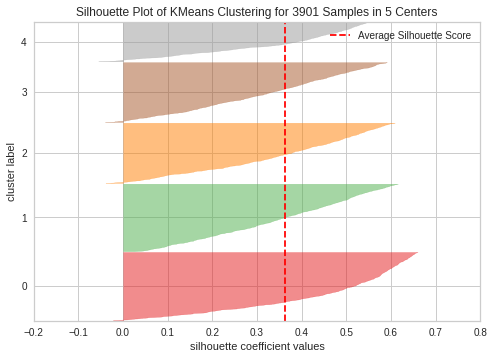

For n_clusters = 6, silhouette score is 0.3416154390277815


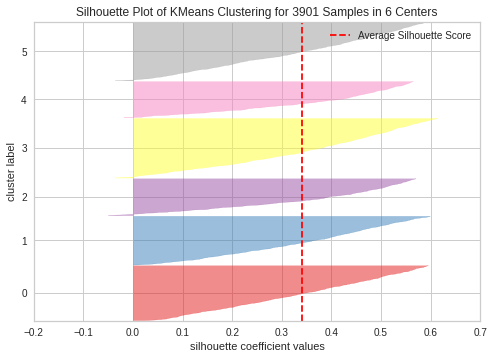

For n_clusters = 7, silhouette score is 0.33738581271239587


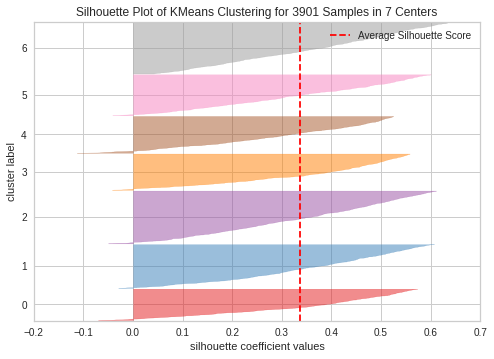

For n_clusters = 8, silhouette score is 0.3301082133906367


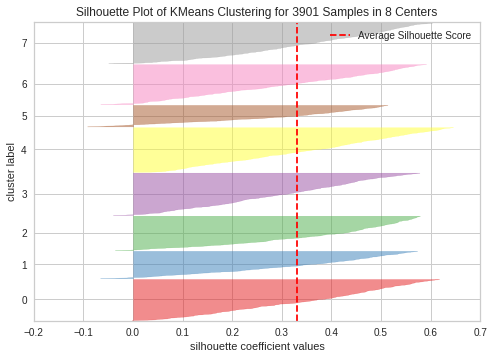

For n_clusters = 9, silhouette score is 0.32978458465410176


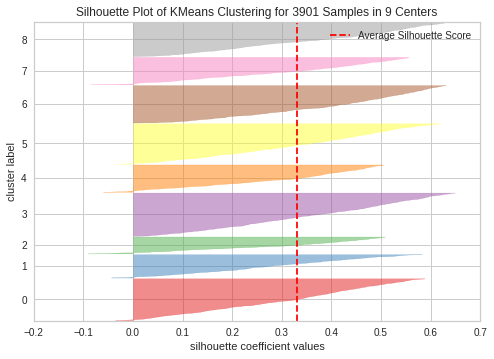

In [60]:
silhouette_analysis(10)

#Applying elbow method on Recency and Monetary

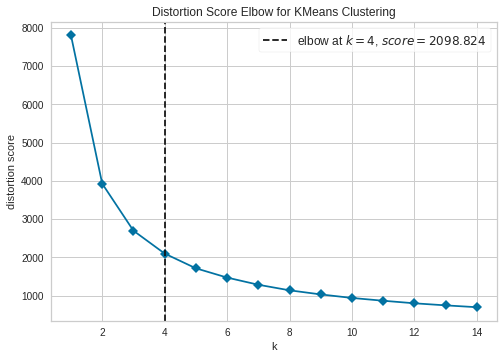

In [61]:
# elbow method to find out the best k
from yellowbrick.cluster import KElbowVisualizer
SSE = {}
for k in range(2,15):
  km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
  km = km.fit(X)
  SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.poof()
plt.show()

()From the silhouette score method and elbow method we have found out that the optimal number of clusters is 4.

()Now, we will implement the final model for Recency and Monetary with number of clusters as 4.

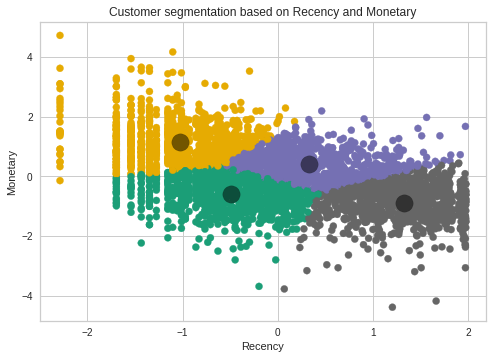

In [62]:
# run KMeans with number of clusters as 4
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_km = kmeans.predict(X)

# plot the clusters
plt.title('Customer segmentation based on Recency and Monetary')
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='Dark2')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=300, alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()


There are 4 clusters in our dataset. Grey, Yellow, Blue, Green

1.High Valued Customers (Grey Points): These customers haven't made any purchase recently but have contributed more monetarily.

2.Moderate Valued Customers (Yellow Points): These customers contributed moderately both in terms of monetary and recency

3.Casual Customers (Green Points): These customers contributions are very less both monetarily and recency

4.New Customers (Blue Points): These customers contributed highlyon recency but less on monetarily.

## Applying Silhouette score method on Frequency and Monetary:


In [63]:
# kmeans with silhouette score method
from yellowbrick.cluster import SilhouetteVisualizer
features = ['transformed_Frequency', 'transformed_Monetary']

# scaling our data
X_features = rfm_df[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)

# function to implement kmeans clustering with silhouette analysis
def silhouette_analysis(n):
  for n_clusters in range(2,n):
    km = KMeans(n_clusters = n_clusters)
    preds = km.fit_predict(X)
    centers = km.cluster_centers_

    score = silhouette_score(X, preds)
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(X)
    visualizer.poof()


For n_clusters = 2, silhouette score is 0.48146136148940094


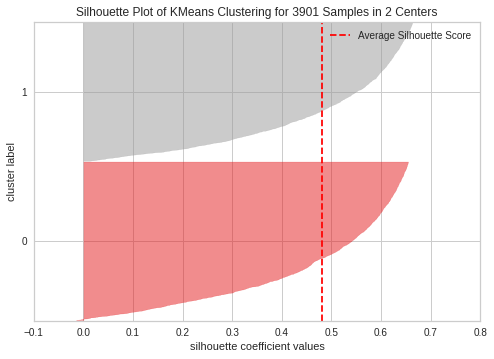

For n_clusters = 3, silhouette score is 0.412617797077651


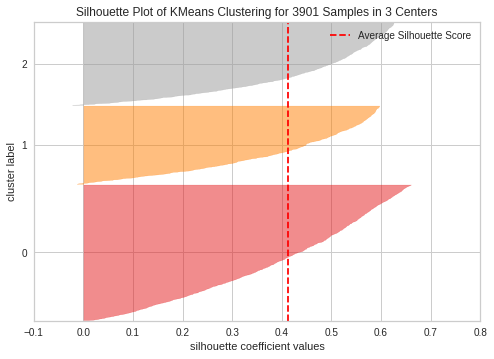

For n_clusters = 4, silhouette score is 0.3757083839001136


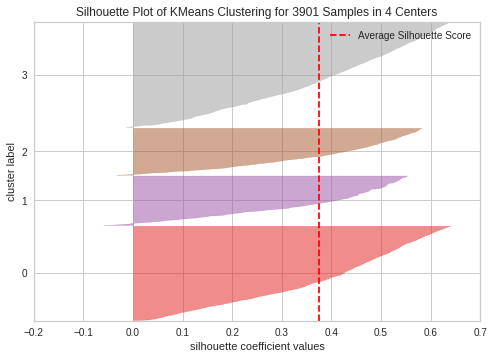

For n_clusters = 5, silhouette score is 0.34764132449586316


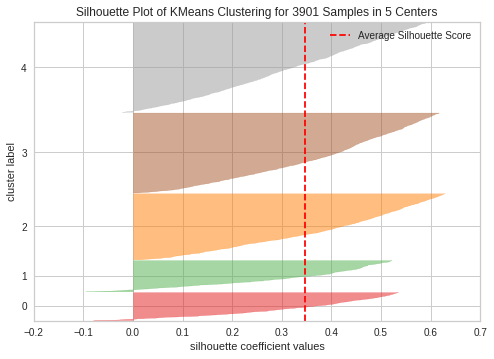

For n_clusters = 6, silhouette score is 0.3306439932921861


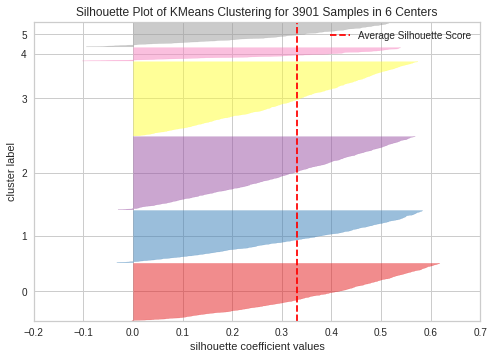

For n_clusters = 7, silhouette score is 0.34795693065376937


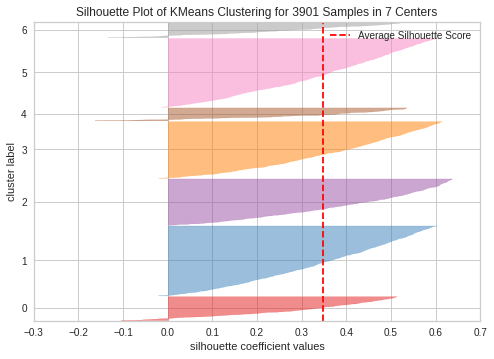

For n_clusters = 8, silhouette score is 0.3232528531209598


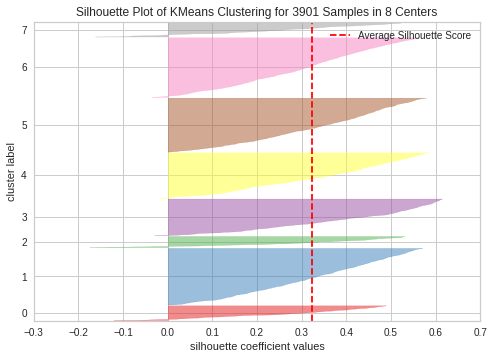

For n_clusters = 9, silhouette score is 0.3425960971650685


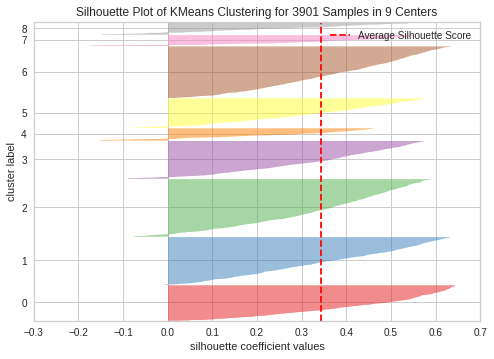

In [64]:
silhouette_analysis(10)


## Applying Elbow method on Frequency and Monetary:

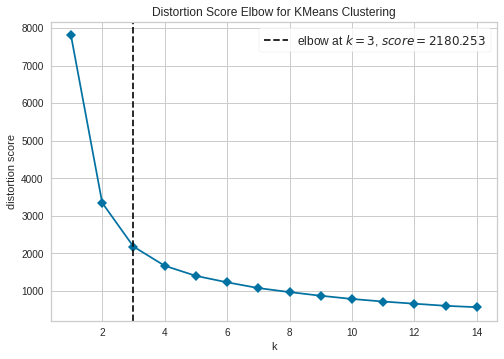

In [65]:
# elbow method to find out the best k
SSE = {}
for k in range(1,15):
  km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
  km = km.fit(X)
  SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.poof()
plt.show()
plt.show()

()From the silhouette analysis and elbow method we reach to the conclusion that the optimal number of clusters is 3 for Frequency and Monetary values.

()We will run the model again with number of clusters as 3.

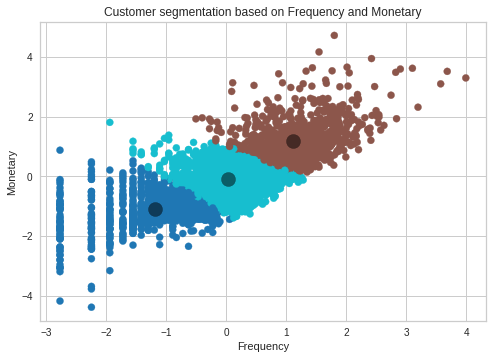

In [66]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_km = kmeans.predict(X)

# plot the clusters
plt.title('Customer segmentation based on Frequency and Monetary')
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='tab10')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

We can observe three clusters from the KMeans model applied on Frequency and Monetary data:

1.New Customers (Dark Blue Points): These are relatively new or very rarely purchasing customers and contribute very less monetarily.

2.Casual Customers (Light Blue Points): These customers purchase more frequently than one time customers and contribute moderately in terms of money.

3.Loyal High Valued Customers (Brown Points): These customers are the most frequent and contribute more monetarily.

## Applying silhouette score method on Recency, Frequency and Monetary:

In [67]:
# kmeans with silhouette score method
from yellowbrick.cluster import SilhouetteVisualizer
features = ['transformed_Recency','transformed_Frequency', 'transformed_Monetary']

# scaling our data
X_features = rfm_df[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)

# function to implement kmeans clustering with silhouette analysis
def silhouette_analysis(n):
  for n_clusters in range(2,n):
    km = KMeans(n_clusters = n_clusters)
    preds = km.fit_predict(X)
    centers = km.cluster_centers_

    score = silhouette_score(X, preds)
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(X)
    visualizer.poof()


For n_clusters = 2, silhouette score is 0.3965080800184126


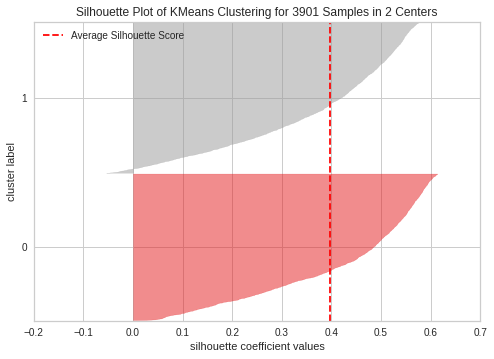

For n_clusters = 3, silhouette score is 0.3106486505890177


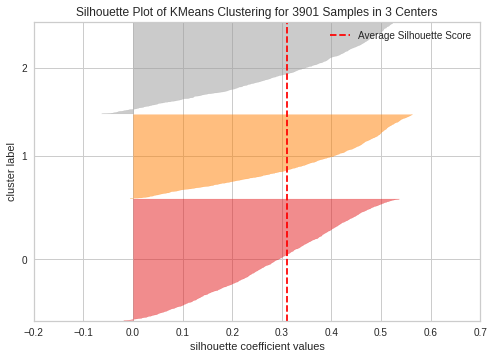

For n_clusters = 4, silhouette score is 0.3005292261045123


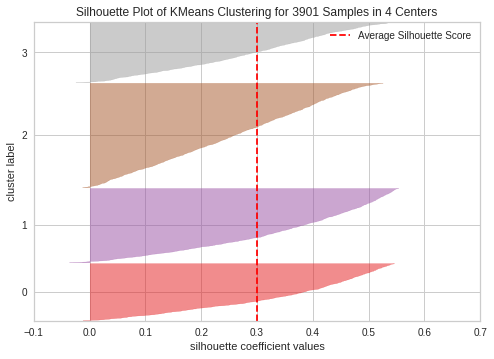

For n_clusters = 5, silhouette score is 0.2921962780948889


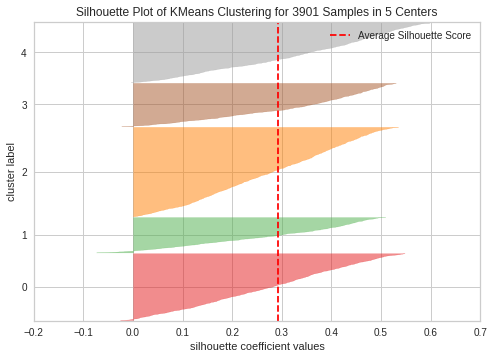

For n_clusters = 6, silhouette score is 0.2862276346918523


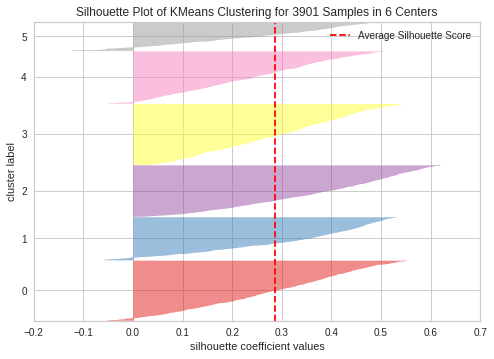

For n_clusters = 7, silhouette score is 0.2736558525651597


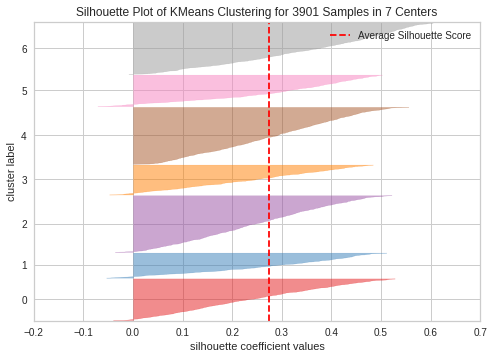

For n_clusters = 8, silhouette score is 0.2586406918778346


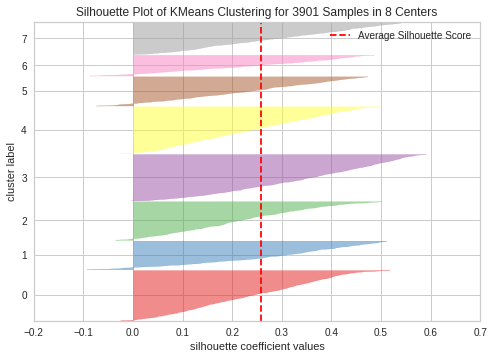

For n_clusters = 9, silhouette score is 0.25853994177535256


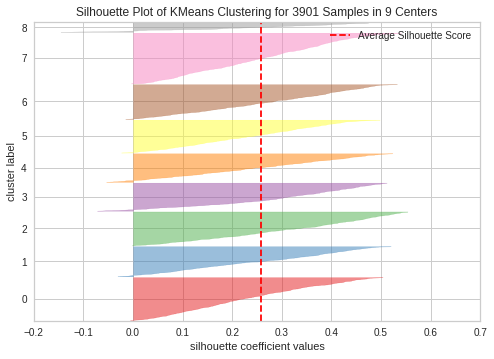

In [68]:
silhouette_analysis(10)

## Applying Elbow method on Recency, Frequency and Monetary:

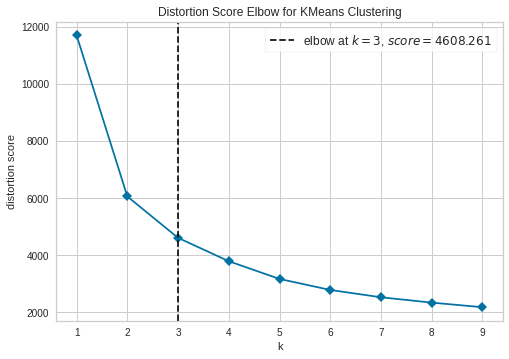

In [69]:
# elbow method to find out the best k
SSE = {}
for k in range(1,10):
  km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
  km = km.fit(X)
  SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1,10), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.poof()
plt.show()


()From the silhouette score and elbow method again we reach the conclusion that the optimal number of clusters is 3 for Recency, Frequency and Monetary values.

()We will again run the model with number of clusters as 3.

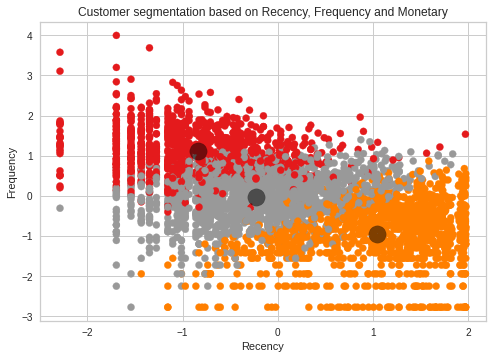

In [70]:
# run KMeans with number of clusters as 3
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_km = kmeans.predict(X)

# plot the clusters
plt.title('Customer segmentation based on Recency, Frequency and Monetary')
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='Set1')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=300, alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

We can observe three clusters from the KMeans model applied on Recency, Frequency and Monetary data:

1.Loyal Customers (Orange Points): These customers are the most frequent buyers or the most loyal customers.

2.Casual Customers (Grey Points): These customers are not the most frequent ones or recent ones.

3.New Customers (Red Points): These are the new customers who have made their purchases very recently.



In [71]:
# find the clusters for the observations in the dataset
rfm_df['Cluster'] = kmeans.labels_
rfm_df.head()

,Recency,Frequency,Monetary,transformed_Recency,transformed_Frequency,transformed_Monetary,Cluster
CustomerID,,,,,,,
12747.0,2,103,4196.01,1.259921,4.634729,8.341889,0
12748.0,0,4410,31687.49,0.000000,8.391630,10.363677,0
12749.0,3,199,4090.88,1.442250,5.293305,8.316515,0
12820.0,3,59,942.34,1.442250,4.077537,6.848366,2
12821.0,214,6,92.72,5.981424,1.791759,4.529584,1


In [72]:
rfm_df.tail()

,Recency,Frequency,Monetary,transformed_Recency,transformed_Frequency,transformed_Monetary,Cluster
CustomerID,,,,,,,
18280.0,277,10,180.60,6.518684,2.302585,5.196285,1
18281.0,180,7,80.82,5.646216,1.945910,4.392224,1
18282.0,7,12,178.05,1.912931,2.484907,5.182064,2
18283.0,3,721,2045.53,1.442250,6.580639,7.623412,0
18287.0,42,70,1837.28,3.476027,4.248495,7.516041,0


## IMPLEMENTATION OF HIERARCHIAL CLUSTERING

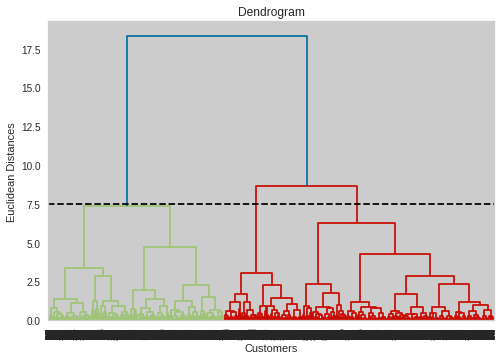

In [73]:
# Finding the optimal number of clusters using dendogram

dendrogram = sch.dendrogram(sch.linkage(data_prepared, method = "ward"))
plt.axhline(y = 7.5, linestyle='--', c = "black")
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()


The Dendrogram indicates that the number of clusters should be three. As a result, we will partition the customers into three groups using Hierarchical Clustering.



In [74]:
# Fitting Hierarchical Clustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
hc_clusters = hc.fit_predict(data_prepared)


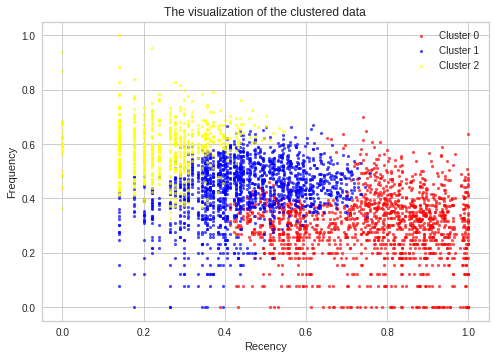

In [75]:
# Visualising the clusters wrt Recency and Frequency

plt.scatter(data_prepared[hc_clusters == 0, 0], data_prepared[hc_clusters == 0, 1],
            marker = ".", s = 40, lw = 0, alpha = 0.7, c = "red", edgecolor='k', label = "Cluster 0")
plt.scatter(data_prepared[hc_clusters == 1, 0], data_prepared[hc_clusters == 1, 1],
            marker = ".", s = 40, lw = 0, alpha = 0.7, c = "blue", edgecolor='k', label = "Cluster 1")
plt.scatter(data_prepared[hc_clusters == 2, 0], data_prepared[hc_clusters == 2, 1],
            marker = ".", s = 40, lw = 0, alpha = 0.7, c = "yellow", edgecolor='k', label = "Cluster 2")

plt.title("The visualization of the clustered data")
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.legend()

plt.show()


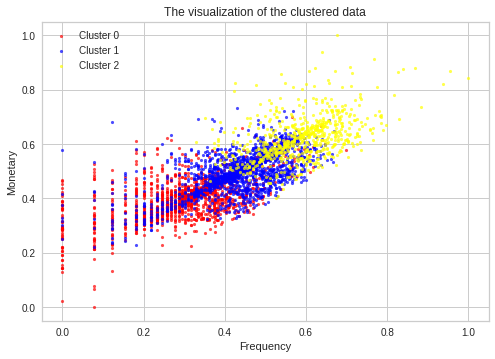

In [76]:
# Visualising the clusters wrt Frequency and Monetary

plt.scatter(data_prepared[hc_clusters == 0, 1], data_prepared[hc_clusters == 0, 2],
            marker = ".", s = 40, lw = 0, alpha = 0.7, c = "red", edgecolor='k', label = "Cluster 0")
plt.scatter(data_prepared[hc_clusters == 1, 1], data_prepared[hc_clusters == 1, 2],
            marker = ".", s = 40, lw = 0, alpha = 0.7, c = "blue", edgecolor='k', label = "Cluster 1")
plt.scatter(data_prepared[hc_clusters == 2, 1], data_prepared[hc_clusters == 2, 2],
            marker = ".", s = 40, lw = 0, alpha = 0.7, c = "yellow", edgecolor='k', label = "Cluster 2")

plt.title("The visualization of the clustered data")
plt.xlabel("Frequency")
plt.ylabel("Monetary")
plt.legend()

plt.show()


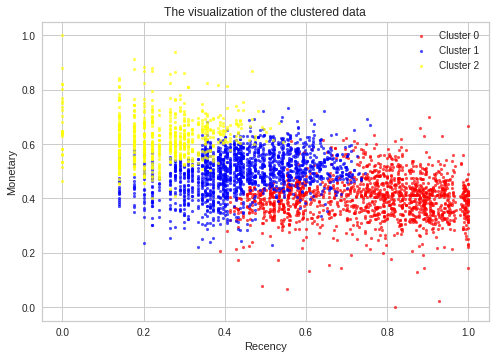

In [77]:
# Visualising the clusters wrt Recency and Monetary 

plt.scatter(data_prepared[hc_clusters == 0, 0], data_prepared[hc_clusters == 0, 2],
            marker = ".", s = 40, lw = 0, alpha = 0.7, c = "red", edgecolor='k', label = "Cluster 0")
plt.scatter(data_prepared[hc_clusters == 1, 0], data_prepared[hc_clusters == 1, 2],
            marker = ".", s = 40, lw = 0, alpha = 0.7, c = "blue", edgecolor='k', label = "Cluster 1")
plt.scatter(data_prepared[hc_clusters == 2, 0], data_prepared[hc_clusters == 2, 2],
            marker = ".", s = 40, lw = 0, alpha = 0.7, c = "yellow", edgecolor='k', label = "Cluster 2")

plt.title("The visualization of the clustered data")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.legend()

plt.show()


After visualising the clusters, it appears that Hierarchical Clustering has done a good job of separating the customers. There is some overlap here as well. So, in order to choose the best clustering algorithm, We will compare the Silhouette scores of these two clustering algorithms.

## Comparing the clusters

In [78]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [79]:

rng = np.random.RandomState(0)
model = KMeans(n_init = 10, random_state = rng)

In [80]:
# Fitting KMeans Clustering

kmeans = KMeans(n_clusters = 3, random_state = rng)
kmeans.fit(data_prepared)
kmeans_clusters = kmeans.predict(data_prepared)


In [81]:
# Comparing the Silhouette score of KMeans and Hierarchical clustering

kmeans_score= silhouette_score(data_prepared, kmeans_clusters)
hc_score= silhouette_score(data_prepared, hc_clusters)
print(f"The silhoutte score of Kmeans and Hierarchical Cluster are {round(kmeans_score, 3)} and {round(hc_score, 3)} respectively.")


The silhoutte score of Kmeans and Hierarchical Cluster are 0.354 and 0.285 respectively.


Since the silhouette score of KMeans is higher, I will segment the customers using the KMeans algorithm.



Silhouette score using KMeans for 3 cluster is 0.35


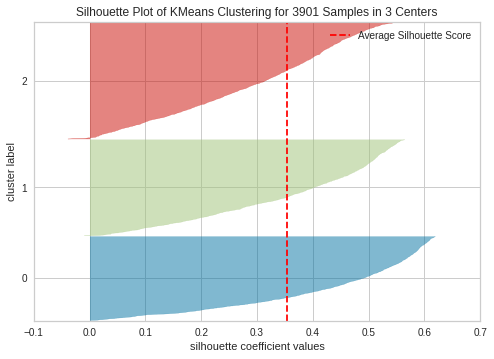

In [82]:
# Visualising the Silhouette coeffients of KMeans Clustering with 3 clusters

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(data_prepared) 
print(f"Silhouette score using KMeans for 3 cluster is {round(visualizer.silhouette_score_, 2)}")       
visualizer.show()    

plt.show()


## Segmenting the customers


In [83]:
# Assigning each customer to their respective cluster in a dataframe 

rfm_df["Cluster"] = kmeans.labels_

In [84]:
# Observing the updated dataframe

rfm_df.head()


,Recency,Frequency,Monetary,transformed_Recency,transformed_Frequency,transformed_Monetary,Cluster
CustomerID,,,,,,,
12747.0,2,103,4196.01,1.259921,4.634729,8.341889,1
12748.0,0,4410,31687.49,0.000000,8.391630,10.363677,1
12749.0,3,199,4090.88,1.442250,5.293305,8.316515,1
12820.0,3,59,942.34,1.442250,4.077537,6.848366,1
12821.0,214,6,92.72,5.981424,1.791759,4.529584,0


In [85]:
import plotly.express as px

In [86]:
# Visualising the clusters in 3D

fig = px.scatter_3d(rfm_df, x=rfm_df["transformed_Recency"], y=rfm_df["transformed_Frequency"], z=rfm_df["transformed_Monetary"], color=rfm_df["Cluster"])
fig.show()


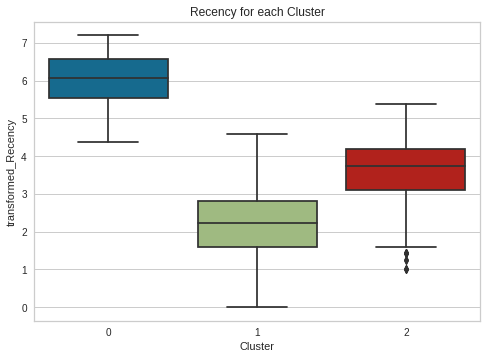

In [87]:
# Visualising Recency for each cluster

sns.boxplot(x = "Cluster" ,y = "transformed_Recency", data = rfm_df)
plt.title("Recency for each Cluster")
plt.show()


Cluster 0 appears to have a high recency rate, implying that this customer segment purchased from the store recently, whereas Cluster 2 appears to have a low recency rate, implying that they purchased from the store long ago .



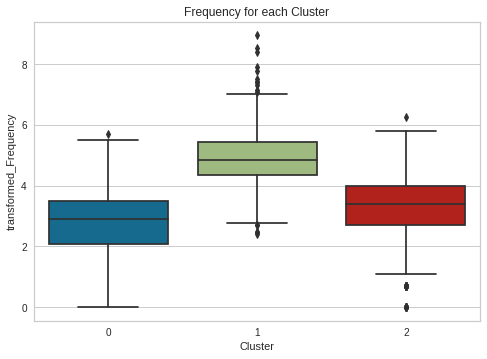

In [88]:
# Visualising Frequency for each cluster

sns.boxplot(x = "Cluster" ,y = "transformed_Frequency", data = rfm_df)
plt.title("Frequency for each Cluster")
plt.show()

Cluster 1 appears to have a high frequency rate, implying that this customer group frequently purchases from the store, whereas Cluster 0 appears to have a low frequency rate, implying that they rarely or very rarely purchase from the store.

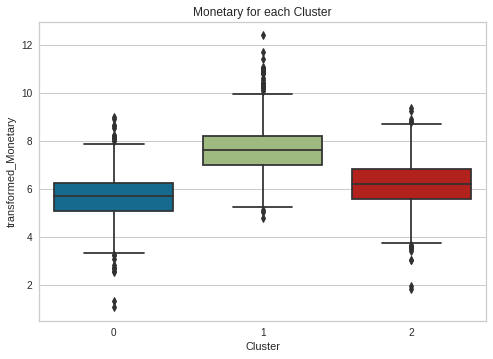

In [89]:
# Visualising Monetary value for each cluster

sns.boxplot(x = "Cluster", y = "transformed_Monetary", data = rfm_df)
plt.title("Monetary for each Cluster")
plt.show()

Cluster 1 appears to have a high monetary rate, indicating that this group has a high monetary transaction rate, whereas Cluster 0 appears to have the lowest.

### The following insights can be gained from each cluster:
###### 1.Tier 1 customers, who buy frequently from the store, spend a significant amount of money, and have not recently purchased from the store, make up Cluster 1
###### 2.Tier 2 customers make up Cluster 2, which are moderate-level customers who buy from the store on a regular basis, spend a reasonable amount of money, but haven't bought from the store in a while.
###### 3. Cluster 0 consists of Tier 3 customers who shop infrequently, spend less money, but have purchased from the store recently.




# CONCLUSION 

1. As we can see that tier 1 customers are the one whose buying freqency is high along with a good monetary spending but their recency is low that means they are not recently purchasing. Stores should find out the reason behind their less recent purchases and should take steps to increase it.
2. As we can see that tier 2 customers performed moderately on both monetary terms and are frequent buyer of the products but they also not have purchased products recently.Stores should find out the reason behind their less recent purchases and should take steps to increase it.
3. As we can see that tier 3 customers did not contribute monetarily and they were not also frequent buyers but they started purchasing recently. So stores should figure out what different they did with tier 3 customers and try to implement the same withtier 1 and tier 2 customers as well to increase recency.